# Révision - Analyse de données sur les ventes de meubles et fournitures de bureau

# 0 - contexte et objectifs

Vous commencez votre mission en tant que Data Analyst chez une enseigne de Retail. On vous a donné accès à leur base de données pour analyse exploratoire : Produits, clients et ventes.
Vous travaillez au service marketing , vous intervenez car l’entreprise souhaite faire le point : analyser ses points forts, ses points faibles, les comportements clients, etc. 

Par exemple, elle cherche à savoir si elle doit créer certaines offres, adapter certains prix, etc.

On vous demande de faire une analyse en deux parties :

Partie I - analyse des différents indicateurs généraux

    Construire des indicateurs et graphiques autour du chiffre d'affaires. Regarder l’évolution dans le temps
    
    faire un zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc.
    
    etudier les profils des clients, et également la répartition du chiffre d'affaires entre eux

Partie II - comportement des clients l’objectif est cette fois-ci de comprendre le comportement des clients en ligne.

    étudier le lien entre le genre d’un client et les catégories des livres achetés
    
    étudier ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.



# 1 - Exploration et  nettoyage des données 

In [3]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

# Import de la librairie matplotlib pour les graphiques à lire dans la ligne
%matplotlib inline

# Import de seaborn pour des graphiques plus esthétiques
import seaborn as sns


## 1.1 - Chargement des données

Si vous utilisez anaconda -> je vous conseille de mettre les fichiers csv dans le même répertoire que le notebook

Si vous utilisez google colab ->  il faut exécuter le code ci-dessous. 

from google.colab import files
data_to_load = files.upload()

### 1.1.1 - customers

In [4]:
# Ouverture du fichier
SuperStoreData = pd.read_csv('superstoredata.csv', encoding='utf-8', encoding_errors='ignore', sep=';')

In [5]:
# Affichage des informations 
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            9994 non-null   object 
 1   order_date          9994 non-null   object 
 2   ship_date           9994 non-null   object 
 3   ship_mode           9994 non-null   object 
 4   customer_id         9994 non-null   object 
 5   sales_rep           9994 non-null   object 
 6   location_id         9993 non-null   object 
 7   product_id          9994 non-null   object 
 8   sales               9994 non-null   float64
 9   quantity            9994 non-null   int64  
 10  discount            9994 non-null   float64
 11  profit              9994 non-null   float64
 12  customer_name       9994 non-null   object 
 13  segment             9994 non-null   object 
 14  product_name        9994 non-null   object 
 15  category            9994 non-null   object 
 16  sub_ca

In [6]:
# Affichage des premières lignes

SuperStoreData.head()

,order_id,order_date,ship_date,ship_mode,customer_id,sales_rep,location_id,product_id,sales,quantity,...,product_name,category,sub_category,sales_team,sales_team_manager,city,state,postal_code,region,Unnamed: 23
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-BO-10001798,261.96,2,...,Bush Somerset Collection Bookcase,Furniture,Bookcases,Organic,Organic,Henderson,Kentucky,42420,South,NaN
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-CH-10000454,731.94,3,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,Organic,Organic,Henderson,Kentucky,42420,South,NaN
2,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Steve Pepple,"90036,Los Angeles",OFF-LA-10000240,14.62,2,...,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,Bravo,Tracy Banks,Los Angeles,California,90036,West,NaN
3,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",FUR-TA-10000577,957.58,5,...,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,Organic,Organic,Fort Lauderdale,Florida,33311,South,NaN
4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",OFF-ST-10000760,22.37,2,...,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,Organic,Organic,Fort Lauderdale,Florida,33311,South,NaN


In [7]:
# Stats du dataframe
SuperStoreData.describe(include = 'all')

,order_id,order_date,ship_date,ship_mode,customer_id,sales_rep,location_id,product_id,sales,quantity,...,product_name,category,sub_category,sales_team,sales_team_manager,city,state,postal_code,region,Unnamed: 23
count,9994,9994,9994,9994,9994,9994,9993,9994,9994.000000,9994.000000,...,9994,9994,9994,9994,9994,9994,9992,9994,9994,6
unique,5009,1237,1334,4,794,14,632,1863,NaN,NaN,...,1818,4,18,6,7,534,54,635,9,3
top,CA-2017-100111,05/09/2016,16/12/2015,Standard Class,WB-21850,Organic,"10035,New York City",OFF-PA-10001970,NaN,NaN,...,Staple envelope,Office Supplies,Binders,Organic,Organic,New York City,California,10035,West,Central
freq,14,38,35,5968,37,6400,263,19,NaN,NaN,...,48,6026,1523,6397,6400,915,1999,263,3203,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.838886,3.789574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.252189,2.225110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.620000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.257500,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.430000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce fichier comprend 3 colonnes :

    Client_id : référence de chaque client
    Sex : le genre du client
    Birth : l'année de naissance du client



In [8]:
print(SuperStoreData)

            order_id  order_date   ship_date       ship_mode customer_id  \
0     CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
1     CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
2     CA-2016-138688  12/06/2016  16/06/2016    Second Class    DV-13045   
3     US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
4     US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
...              ...         ...         ...             ...         ...   
9989  CA-2014-110422  21/01/2014  23/01/2014    Second Class    TB-21400   
9990  CA-2017-121258  26/02/2017  03/03/2017  Standard Class    DB-13060   
9991  CA-2017-121258  26/02/2017  03/03/2017  Standard Class    DB-13060   
9992  CA-2017-121258  26/02/2017  03/03/2017  Standard Class    DB-13060   
9993  CA-2017-119914  04/05/2017  09/05/2017    Second Class    CC-12220   

         sales_rep            location_id       product_id   sales  quantity  \
0      

In [9]:
#valeurs manquantes
SuperStoreData.isna().mean()

order_id              0.0000
order_date            0.0000
ship_date             0.0000
ship_mode             0.0000
customer_id           0.0000
sales_rep             0.0000
location_id           0.0001
product_id            0.0000
sales                 0.0000
quantity              0.0000
discount              0.0000
profit                0.0000
customer_name         0.0000
segment               0.0000
product_name          0.0000
category              0.0000
sub_category          0.0000
sales_team            0.0000
sales_team_manager    0.0000
city                  0.0000
state                 0.0002
postal_code           0.0000
region                0.0000
Unnamed: 23           0.9994
dtype: float64

In [10]:
SuperStoreData.isna().sum()

order_id                 0
order_date               0
ship_date                0
ship_mode                0
customer_id              0
sales_rep                0
location_id              1
product_id               0
sales                    0
quantity                 0
discount                 0
profit                   0
customer_name            0
segment                  0
product_name             0
category                 0
sub_category             0
sales_team               0
sales_team_manager       0
city                     0
state                    2
postal_code              0
region                   0
Unnamed: 23           9988
dtype: int64

In [11]:
# Analyse de la colonne 'Unnamed: 23'
print(SuperStoreData['Unnamed: 23'].value_counts(dropna=False))

Unnamed: 23
NaN        9988
Central       3
South         2
East          1
Name: count, dtype: int64


In [12]:
# Suppression de la colonne 'Unnamed: 23' car elle contient 99,88 % de valeurs manquantes
SuperStoreData = SuperStoreData.drop(columns=['Unnamed: 23'])

In [13]:
# Analyse de la colonne 'location_id'
print(SuperStoreData[SuperStoreData['location_id'].isna()])

          order_id  order_date   ship_date     ship_mode customer_id  \
18  CA-2014-143336  27/08/2014  01/09/2014  Second Class    ZD-21925   

   sales_rep location_id       product_id  sales  quantity  ...   segment  \
18   Organic         NaN  OFF-AR-10003056   8.56         2  ...  Consumer   

    product_name         category sub_category sales_team sales_team_manager  \
18    Newell 341  Office Supplies          Art    Organic            Organic   

             city       state postal_code region  
18  San Francisco  California       94109   West  

[1 rows x 23 columns]


In [14]:
# Si une table de correspondance existe (ex. postal_code -> location_id => on peut l'utiliser pour remplir les valeurs manquantes)
dict_zip_to_location = {'94109': 'LOC_SF'}  # Selon mes données
SuperStoreData['location_id'] = SuperStoreData['location_id'].fillna(SuperStoreData['postal_code'].map(dict_zip_to_location))
# Sinon, marquer comme 'Unknown'
SuperStoreData['location_id'] = SuperStoreData['location_id'].fillna('Unknown')

Solution pragmatique : Marquer comme "Unknown" est une solution rapide et sûre car aucune correspondance n’est disponible, permettant de continuer l’analyse sans introduire de biais.

In [15]:
# Analyse de la colonne 'state'
print(SuperStoreData[SuperStoreData['state'].isna()])

         order_id  order_date   ship_date       ship_mode customer_id  \
5  CA-2014-115812  09/06/2014  14/06/2014  Standard Class    BH-11710   
6  CA-2014-115812  09/06/2014  14/06/2014  Standard Class    BH-11710   

  sales_rep        location_id       product_id  sales  quantity  ...  \
5   Organic  90032,Los Angeles  FUR-FU-10001487  48.86         7  ...   
6   Organic  90032,Los Angeles  OFF-AR-10002833   7.28         4  ...   

    segment                                       product_name  \
5  Consumer  Eldon Expressions Wood and Plastic Desk Access...   
6  Consumer                                         Newell 322   

          category sub_category sales_team sales_team_manager         city  \
5        Furniture  Furnishings    Organic            Organic  Los Angeles   
6  Office Supplies          Art    Organic            Organic  Los Angeles   

  state postal_code region  
5   NaN       90032   West  
6   NaN       90032   West  

[2 rows x 23 columns]


Pourquoi ? Les deux lignes ont city=Los Angeles et postal_code=90032, qui correspondent à l’état de Californie. L’imputation basée sur ces informations est précise et préserve les données utiles (ex. sales, profit) pour l’analyse. Supprimer les lignes risquerait de perdre des informations valides, et marquer comme "Unknown" serait moins informatif vu que l’état peut être déduit avec certitude.

In [16]:
# Que faire ? Imputer la valeur manquante dans state avec "California" pour les deux lignes :
SuperStoreData['state'] = SuperStoreData['state'].fillna('California')

Vérification de l’intégrité des données après traitement

In [17]:
print(SuperStoreData.isna().sum())

order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
sales_rep             0
location_id           0
product_id            0
sales                 0
quantity              0
discount              0
profit                0
customer_name         0
segment               0
product_name          0
category              0
sub_category          0
sales_team            0
sales_team_manager    0
city                  0
state                 0
postal_code           0
region                0
dtype: int64


In [18]:
#Doublon
SuperStoreData.duplicated().sum()

np.int64(1)

Identifier la ou les lignes dupliquées

In [19]:
print(SuperStoreData[SuperStoreData.duplicated(keep=False)])

            order_id  order_date   ship_date       ship_mode customer_id  \
3409  US-2014-150119  23/04/2014  27/04/2014  Standard Class    LB-16795   
3410  US-2014-150119  23/04/2014  27/04/2014  Standard Class    LB-16795   

     sales_rep     location_id       product_id   sales  quantity  ...  \
3409   Organic  43229,Columbus  FUR-CH-10002965  281.37         2  ...   
3410   Organic  43229,Columbus  FUR-CH-10002965  281.37         2  ...   

          segment                                       product_name  \
3409  Home Office  Global Leather Highback Executive Chair with P...   
3410  Home Office  Global Leather Highback Executive Chair with P...   

       category sub_category sales_team sales_team_manager      city state  \
3409  Furniture       Chairs    Organic            Organic  Columbus  Ohio   
3410  Furniture       Chairs    Organic            Organic  Columbus  Ohio   

     postal_code region  
3409       43229   East  
3410       43229   East  

[2 rows x 23 colu

Supprimer le doublon est approprié pour éviter de fausser les analyses (ex. surestimation des ventes ou du profit). Aucune information unique ne serait perdue, car les lignes sont rigoureusement identiques.

In [20]:
SuperStoreData = SuperStoreData.drop_duplicates(keep='first')

In [21]:
print("Il y a", SuperStoreData.describe(include = 'all').loc["unique","customer_id"], "clients uniques")

Il y a 794 clients uniques


Données après ces traitements

In [22]:
print(SuperStoreData.isna().sum())

order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
sales_rep             0
location_id           0
product_id            0
sales                 0
quantity              0
discount              0
profit                0
customer_name         0
segment               0
product_name          0
category              0
sub_category          0
sales_team            0
sales_team_manager    0
city                  0
state                 0
postal_code           0
region                0
dtype: int64


Visualisations

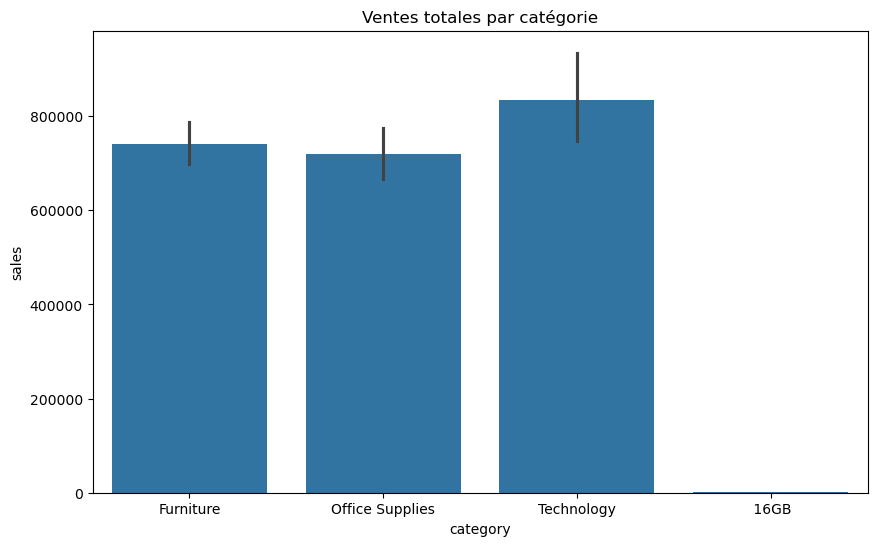

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=SuperStoreData, estimator=sum)
plt.title('Ventes totales par catégorie')
plt.show()

In [24]:
print(SuperStoreData[['sales', 'profit', 'quantity']].describe())

              sales       profit     quantity
count   9993.000000  9993.000000  9993.000000
mean     229.833730    28.661048     3.789753
std      623.283162   234.271571     2.225149
min      -95.620000 -6599.980000     1.000000
25%       17.250000     1.730000     2.000000
50%       54.380000     8.670000     3.000000
75%      209.940000    29.360000     5.000000
max    22638.480000  8399.980000    14.000000


Histogramme pour sales

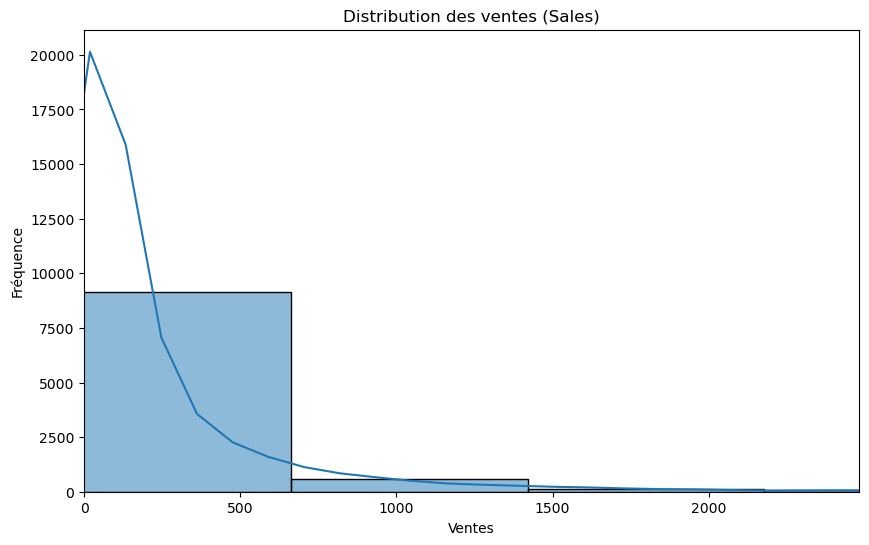

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(SuperStoreData['sales'], bins=30, kde=True)
plt.title('Distribution des ventes (Sales)')
plt.xlabel('Ventes')
plt.ylabel('Fréquence')
plt.xlim(0, SuperStoreData['sales'].quantile(0.99))  # Limiter pour zoomer sur 99% des données
plt.show()

Pourquoi ? L’histogramme montre l’asymétrie et les valeurs extrêmes. La limite à 99 % exclut les outliers pour une meilleure lisibilité.

In [26]:
#print("L'age moyen des clients est :", 2022- round(SuperStoreData.describe(include = 'all').loc["mean","birth"]), "ans")

Boxplot pour profits _ Pourquoi ? Le boxplot mettra en évidence les profits négatifs et les outliers, aidant à identifier les transactions problématiques.

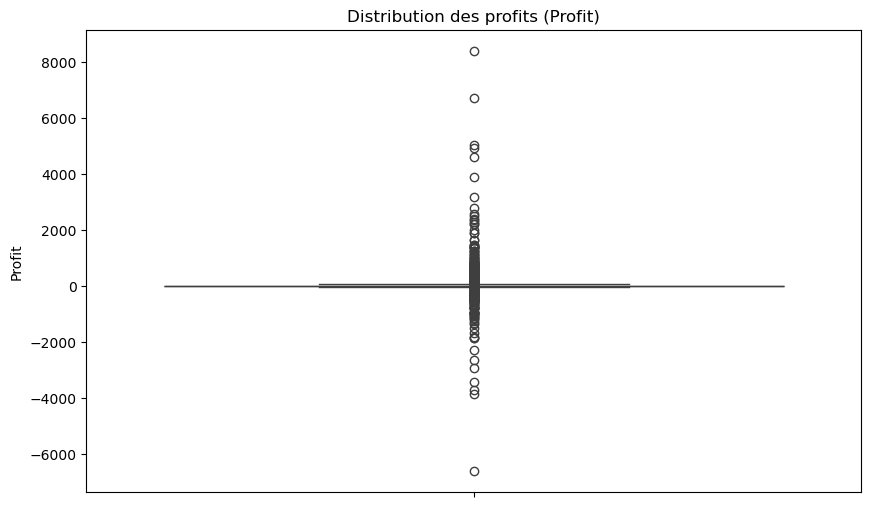

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=SuperStoreData['profit'])
plt.title('Distribution des profits (Profit)')
plt.ylabel('Profit')
plt.show()

Countplot pour quantity _ Pourquoi ? Comme quantity est discrète (entiers), un countplot est plus adapté qu’un histogramme pour voir les fréquences exactes.

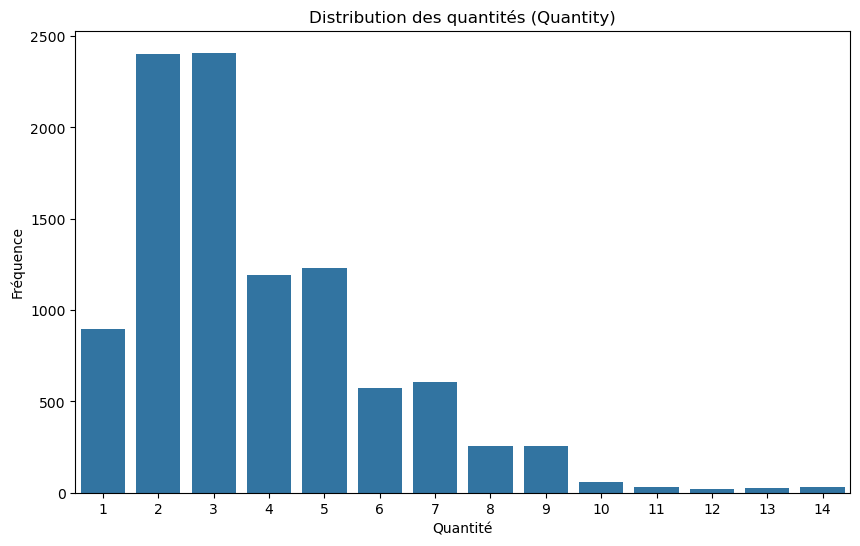

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x=SuperStoreData['quantity'])
plt.title('Distribution des quantités (Quantity)')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
plt.show()

Ventes par régions

In [29]:
print(SuperStoreData.groupby('region')['sales'].sum())

region
19143         116.78
28052         700.70
60623         408.74
62521         408.74
74133         291.96
Central    500130.44
East       678383.21
South      390829.96
West       725457.93
Name: sales, dtype: float64


In [30]:
# ces régions "numériques"
print(SuperStoreData[SuperStoreData['region'].isin(['19143', '28052', '60623', '62521', '74133'])])

            order_id  order_date   ship_date       ship_mode customer_id  \
181   CA-2014-166191  05/12/2014  09/12/2014    Second Class    DK-13150   
430   US-2016-123750  15/04/2016  21/04/2016  Standard Class    RB-19795   
431   US-2016-123750  15/04/2016  21/04/2016  Standard Class    RB-19795   
1410  US-2014-118486  06/04/2014  08/04/2014     First Class    SD-20485   
1973  CA-2017-117485  23/09/2017  29/09/2017  Standard Class    BD-11320   
1975  CA-2017-140242  06/05/2017  11/05/2017  Standard Class    ML-17755   

             sales_rep         location_id       product_id   sales  quantity  \
181       Steve Pepple       62521,Decatur  TEC-AC-10004659  408.74         7   
430            Organic      28052,Gastonia  TEC-AC-10004659  408.74         7   
431            Organic      28052,Gastonia  TEC-AC-10004659  291.96         5   
1410           Anne Wu  19143,Philadelphia  TEC-AC-10004659  116.78         2   
1973           Organic         74133,Tulsa  TEC-AC-10004659  2

In [31]:
# Réassigner les régions en fonction des codes postaux et villes
region_mapping = {
    '19143': 'East',    # Philadelphia, PA
    '28052': 'South',   # Gastonia, NC
    '60623': 'Central', # Chicago, IL
    '62521': 'Central', # Decatur, IL
    '74133': 'South'    # Tulsa, OK
}

SuperStoreData['region'] = SuperStoreData['region'].replace(region_mapping)

In [32]:
# Vérifier que les corrections sont appliquées
print(SuperStoreData['region'].value_counts())

region
West       3203
East       2847
Central    2322
South      1621
Name: count, dtype: int64


In [33]:
print(SuperStoreData.groupby('region')['sales'].sum())

region
Central    500947.92
East       678499.99
South      391822.62
West       725457.93
Name: sales, dtype: float64


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_11712\1578590837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=df_sales, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


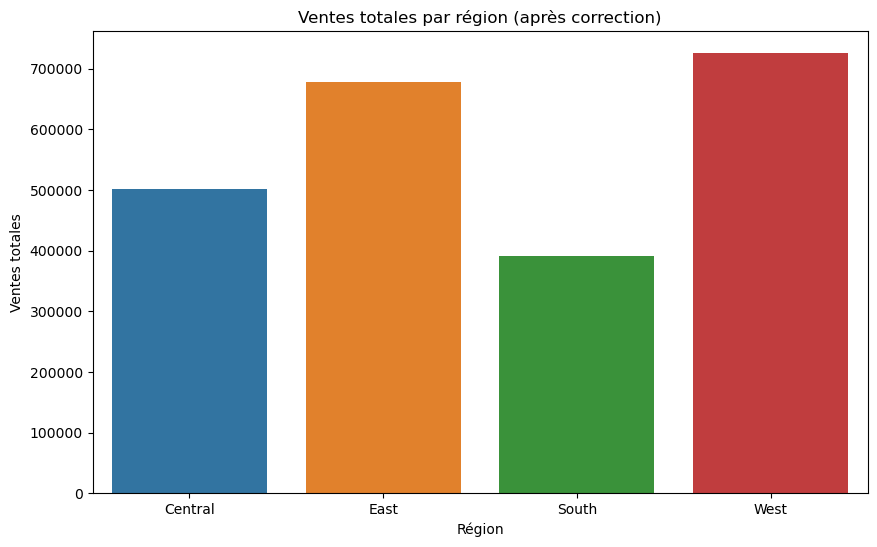

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données des ventes par région (basées sur votre output)
data = {
    'region': ['Central', 'East', 'South', 'West'],
    'sales': [500947.92, 678499.99, 391822.62, 725457.93]
}
df_sales = pd.DataFrame(data)

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='sales', data=df_sales, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Ventes totales par région (après correction)')
plt.xlabel('Région')
plt.ylabel('Ventes totales')
plt.show()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_11712\2476967378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=SuperStoreData, estimator=sum, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


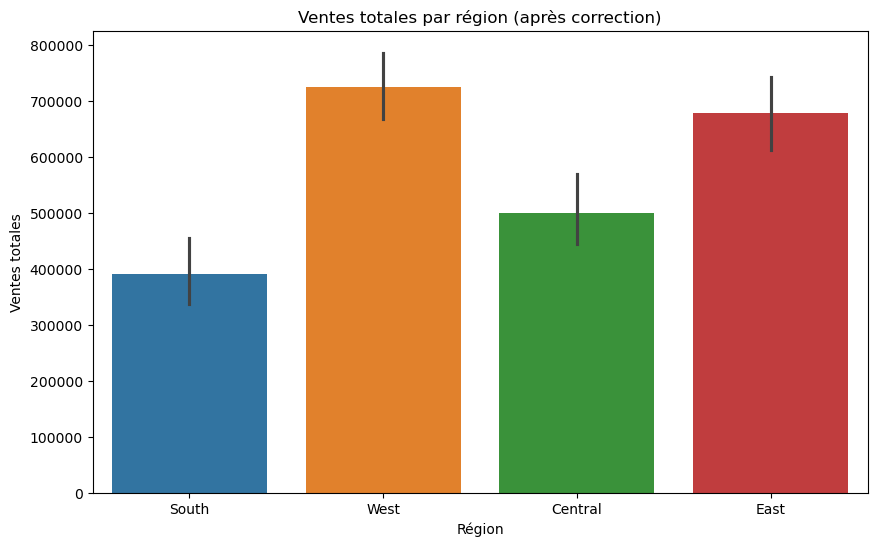

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='sales', data=SuperStoreData, estimator=sum, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Ventes totales par région (après correction)')
plt.xlabel('Région')
plt.ylabel('Ventes totales')
plt.show()

Corrélation entre sales et profit

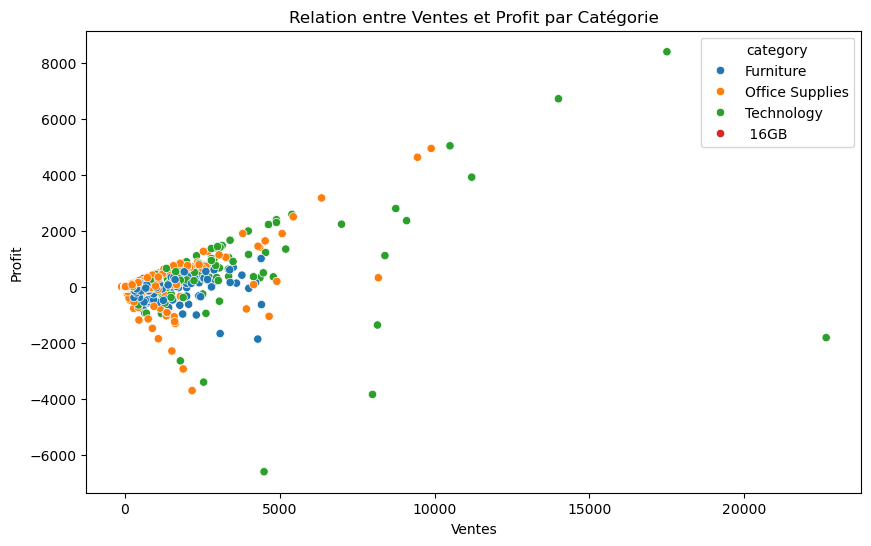

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=SuperStoreData, hue='category')
plt.title('Relation entre Ventes et Profit par Catégorie')
plt.xlabel('Ventes')
plt.ylabel('Profit')
plt.show()

Vérifiez les outliers : Les valeurs extrêmes dans sales (22 638.48) et profit (-6599.98, 8399.98) méritent une investigation

In [37]:
print(SuperStoreData[SuperStoreData['sales'] > SuperStoreData['sales'].quantile(0.99)])

            order_id  order_date   ship_date       ship_mode customer_id  \
27    US-2015-150630  17/09/2015  21/09/2015  Standard Class    TB-21521   
165   CA-2014-139892  08/09/2014  12/09/2014  Standard Class    BM-11140   
251   CA-2016-145625  11/09/2016  17/09/2016  Standard Class    KC-16540   
262   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
263   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
...              ...         ...         ...             ...         ...   
9649  CA-2016-107104  26/11/2016  30/11/2016  Standard Class    MS-17365   
9660  CA-2016-160717  06/06/2016  11/06/2016  Standard Class    ME-17320   
9741  CA-2015-117086  08/11/2015  12/11/2015  Standard Class    QJ-19255   
9857  CA-2015-164301  26/03/2015  30/03/2015  Standard Class    EB-13840   
9929  CA-2016-129630  04/09/2016  04/09/2016        Same Day    IM-15055   

              sales_rep          location_id       product_id    sales  \
27           

In [38]:
print(SuperStoreData[SuperStoreData['profit'].abs() > SuperStoreData['profit'].quantile(0.99)])

            order_id  order_date   ship_date       ship_mode customer_id  \
27    US-2015-150630  17/09/2015  21/09/2015  Standard Class    TB-21521   
149   CA-2016-114489  05/12/2016  09/12/2016  Standard Class    JE-16165   
165   CA-2014-139892  08/09/2014  12/09/2014  Standard Class    BM-11140   
215   CA-2015-146262  02/01/2015  09/01/2015  Standard Class    VW-21775   
251   CA-2016-145625  11/09/2016  17/09/2016  Standard Class    KC-16540   
...              ...         ...         ...             ...         ...   
9741  CA-2015-117086  08/11/2015  12/11/2015  Standard Class    QJ-19255   
9774  CA-2014-169019  26/07/2014  30/07/2014  Standard Class    LF-17185   
9857  CA-2015-164301  26/03/2015  30/03/2015  Standard Class    EB-13840   
9929  CA-2016-129630  04/09/2016  04/09/2016        Same Day    IM-15055   
9948  CA-2017-121559  01/06/2017  03/06/2017    Second Class    HW-14935   

              sales_rep          location_id       product_id    sales  \
27           

Sales par category

In [39]:
print(SuperStoreData.groupby('category')['sales'].sum())

category
 16GB                1926.92
Furniture          741718.61
Office Supplies    718855.75
Technology         834227.18
Name: sales, dtype: float64


Vérifier l’anomalie 16GB

In [40]:
print(SuperStoreData[SuperStoreData['category'] == '16GB'])

Empty DataFrame
Columns: [order_id, order_date, ship_date, ship_mode, customer_id, sales_rep, location_id, product_id, sales, quantity, discount, profit, customer_name, segment, product_name, category, sub_category, sales_team, sales_team_manager, city, state, postal_code, region]
Index: []

[0 rows x 23 columns]


In [41]:
print(SuperStoreData.groupby('category')['sales'].sum())

category
 16GB                1926.92
Furniture          741718.61
Office Supplies    718855.75
Technology         834227.18
Name: sales, dtype: float64


In [42]:
print(SuperStoreData['category'].unique())

['Furniture' 'Office Supplies' 'Technology' ' 16GB']


In [43]:
print(SuperStoreData[SuperStoreData['category'] == '16GB'])

Empty DataFrame
Columns: [order_id, order_date, ship_date, ship_mode, customer_id, sales_rep, location_id, product_id, sales, quantity, discount, profit, customer_name, segment, product_name, category, sub_category, sales_team, sales_team_manager, city, state, postal_code, region]
Index: []

[0 rows x 23 columns]


In [44]:
# Remplacer ' 16GB' (avec espace) par 'Technology'
SuperStoreData['category'] = SuperStoreData['category'].replace(' 16GB', 'Technology')

# Vérifier les catégories après correction
print(SuperStoreData['category'].unique())
print(SuperStoreData.groupby('category')['sales'].sum())

['Furniture' 'Office Supplies' 'Technology']
category
Furniture          741718.61
Office Supplies    718855.75
Technology         836154.10
Name: sales, dtype: float64


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_11712\1951936203.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=sales_by_category, palette=['#1f77b4', '#ff7f0e', '#2ca02c'])


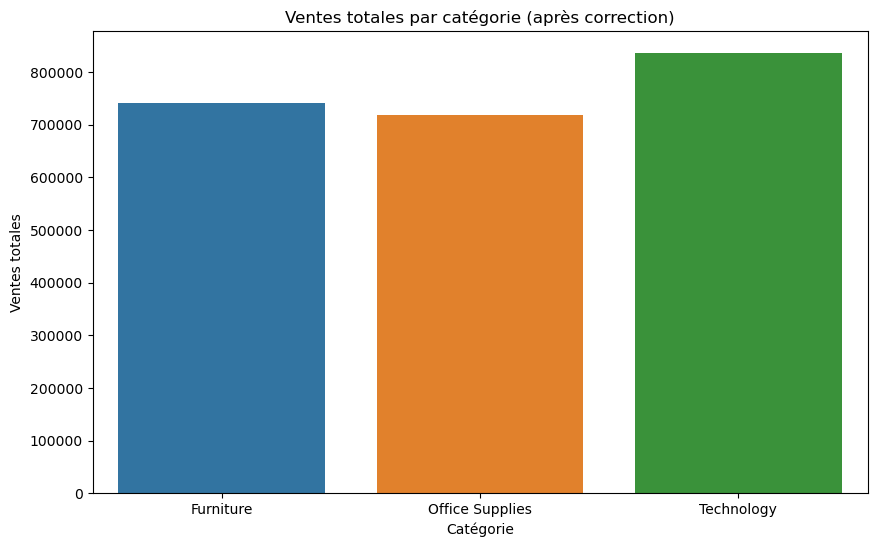

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des ventes par catégorie après correction
sales_by_category = SuperStoreData.groupby('category')['sales'].sum().reset_index()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=sales_by_category, palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Ventes totales par catégorie (après correction)')
plt.xlabel('Catégorie')
plt.ylabel('Ventes totales')
plt.show()

In [46]:
# Profits par catégorie
print(SuperStoreData.groupby('category')['profit'].sum())

category
Furniture           18463.31
Office Supplies    122490.88
Technology         145455.66
Name: profit, dtype: float64


In [47]:
# Outliers
print(SuperStoreData[SuperStoreData['sales'] > SuperStoreData['sales'].quantile(0.99)])

            order_id  order_date   ship_date       ship_mode customer_id  \
27    US-2015-150630  17/09/2015  21/09/2015  Standard Class    TB-21521   
165   CA-2014-139892  08/09/2014  12/09/2014  Standard Class    BM-11140   
251   CA-2016-145625  11/09/2016  17/09/2016  Standard Class    KC-16540   
262   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
263   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
...              ...         ...         ...             ...         ...   
9649  CA-2016-107104  26/11/2016  30/11/2016  Standard Class    MS-17365   
9660  CA-2016-160717  06/06/2016  11/06/2016  Standard Class    ME-17320   
9741  CA-2015-117086  08/11/2015  12/11/2015  Standard Class    QJ-19255   
9857  CA-2015-164301  26/03/2015  30/03/2015  Standard Class    EB-13840   
9929  CA-2016-129630  04/09/2016  04/09/2016        Same Day    IM-15055   

              sales_rep          location_id       product_id    sales  \
27           

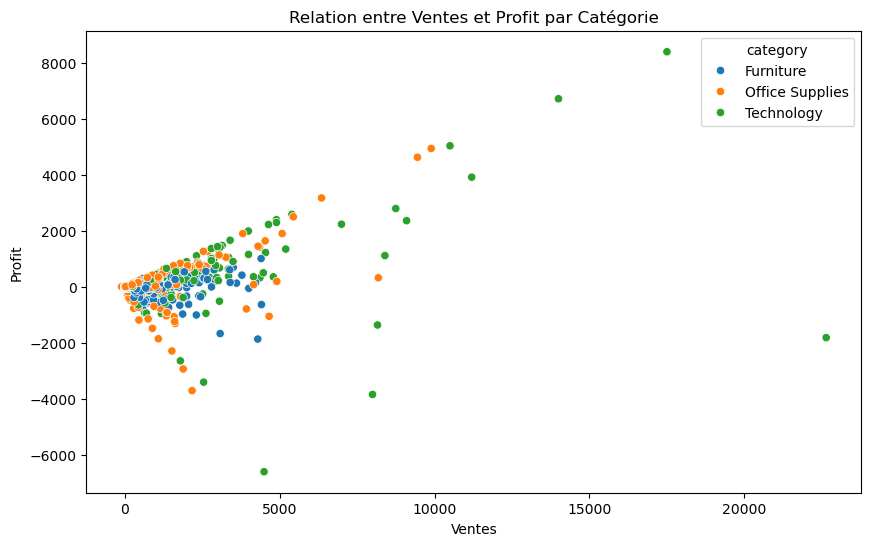

In [48]:
# Relation sales/profit 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=SuperStoreData, hue='category')
plt.title('Relation entre Ventes et Profit par Catégorie')
plt.xlabel('Ventes')
plt.ylabel('Profit')
plt.show()

In [49]:
print(SuperStoreData.groupby('category')['profit'].sum())

category
Furniture           18463.31
Office Supplies    122490.88
Technology         145455.66
Name: profit, dtype: float64


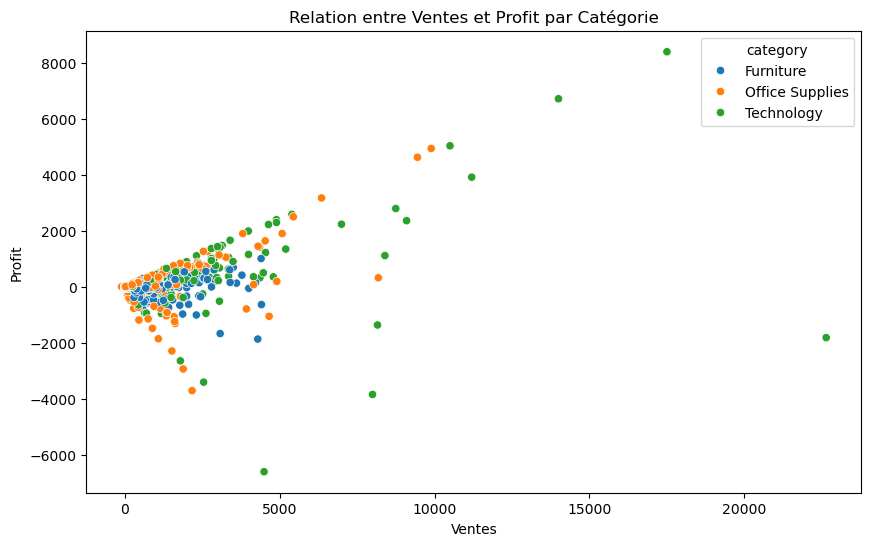

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=SuperStoreData, hue='category')
plt.title('Relation entre Ventes et Profit par Catégorie')
plt.xlabel('Ventes')
plt.ylabel('Profit')
plt.show()

In [51]:
SuperStoreData.to_csv('superstoredata_cleaned.csv', index=False, sep=';')

In [52]:
# Sauvegarde du dataframe nettoyé dans un nouveau fichier CSV   
cleaned_file = 'superstoredata_cleaned.csv'

In [53]:
cleaned_file

'superstoredata_cleaned.csv'

In [55]:
df_cleaned_file = pd.read_csv(cleaned_file, sep=';')

In [56]:
df_cleaned_file.head()

,order_id,order_date,ship_date,ship_mode,customer_id,sales_rep,location_id,product_id,sales,quantity,...,segment,product_name,category,sub_category,sales_team,sales_team_manager,city,state,postal_code,region
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-BO-10001798,261.96,2,...,Consumer,Bush Somerset Collection Bookcase,Furniture,Bookcases,Organic,Organic,Henderson,Kentucky,42420,South
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-CH-10000454,731.94,3,...,Consumer,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,Organic,Organic,Henderson,Kentucky,42420,South
2,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Steve Pepple,"90036,Los Angeles",OFF-LA-10000240,14.62,2,...,Corporate,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,Bravo,Tracy Banks,Los Angeles,California,90036,West
3,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",FUR-TA-10000577,957.58,5,...,Consumer,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,Organic,Organic,Fort Lauderdale,Florida,33311,South
4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",OFF-ST-10000760,22.37,2,...,Consumer,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,Organic,Organic,Fort Lauderdale,Florida,33311,South


In [57]:
df_cleaned_file

,order_id,order_date,ship_date,ship_mode,customer_id,sales_rep,location_id,product_id,sales,quantity,...,segment,product_name,category,sub_category,sales_team,sales_team_manager,city,state,postal_code,region
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-BO-10001798,261.96,2,...,Consumer,Bush Somerset Collection Bookcase,Furniture,Bookcases,Organic,Organic,Henderson,Kentucky,42420,South
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-CH-10000454,731.94,3,...,Consumer,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,Organic,Organic,Henderson,Kentucky,42420,South
2,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Steve Pepple,"90036,Los Angeles",OFF-LA-10000240,14.62,2,...,Corporate,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,Bravo,Tracy Banks,Los Angeles,California,90036,West
3,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",FUR-TA-10000577,957.58,5,...,Consumer,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,Organic,Organic,Fort Lauderdale,Florida,33311,South
4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",OFF-ST-10000760,22.37,2,...,Consumer,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,Organic,Organic,Fort Lauderdale,Florida,33311,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Organic,"33180,Miami",FUR-FU-10001889,25.25,3,...,Consumer,Ultra Door Pull Handle,Furniture,Furnishings,Organic,Organic,Miami,Florida,33180,South
9989,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Organic,"92627,Costa Mesa",FUR-FU-10000747,91.96,2,...,Consumer,Tenex B1-RE Series Chair Mats for Low Pile Car...,Furniture,Furnishings,Organic,Organic,Costa Mesa,California,92627,West
9990,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Organic,"92627,Costa Mesa",TEC-PH-10003645,258.58,2,...,Consumer,Aastra 57i VoIP phone,Technology,Phones,Organic,Organic,Costa Mesa,California,92627,West
9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Organic,"92627,Costa Mesa",OFF-PA-10004041,29.60,4,...,Consumer,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Office Supplies,Paper,Organic,Organic,Costa Mesa,California,92627,West


# API

In [58]:
from fastapi import FastAPI, Depends, HTTPException
import sqlite3
from fastapi import FastAPI, HTTPException
from fastapi.responses import JSONResponse
import nest_asyncio
import uvicorn

In [59]:
# Pour exécuter FastAPI dans un notebook
nest_asyncio.apply()

app = FastAPI()


# Route simple sans paramètre
@app.get("/")
async def root():
    return {"message": "Bienvenue sur l'API de ADV Analyse des Ventes créée par Abdallah, Rayann et Raymond !"}

# Route avec un paramètre de chemin (path parameter)
@app.get("/utilisateur_numéro/{user_id}")
async def get_user(user_id: int):
    return {"message": f"Infos de l'utilisateur avec l'ID numéro {user_id}"}

# Route avec un paramètre de chemin "UserName" (username path parameter)
@app.get("/{user_name}")
async def get_userName(user_name: str):
    return {"What's my name ?": f"My name is {user_name}"}

# Lancer l'application (dans un notebook)
uvicorn.run(app, host="127.0.0.1", port=4000)

# --- Pour voir toutes les routes API ---
# http://127.0.0.1:4000/docs

INFO:     Started server process [11712]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:4000 (Press CTRL+C to quit)


INFO:     127.0.0.1:51842 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:51842 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:51843 - "GET /utilisateur_num%C3%A9ro/1 HTTP/1.1" 200 OK
INFO:     127.0.0.1:51843 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:51850 - "GET /raymond HTTP/1.1" 200 OK
INFO:     127.0.0.1:51850 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:51873 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:51873 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:51888 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:51888 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [11712]
